# Seafood (HOTDOG OR NOT A HOTDOG)

In [40]:
from PIL import Image
from matplotlib.pyplot import imshow
from os import listdir
from os.path import isfile, join
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Model
import os
import numpy as np
import matplotlib.pyplot as plt

# Image preprocessing for feeding into model
Using PIL image library
1.Image to array conversion
2.Array image reshaping in 64pixels shape(64*64*3)
3.Stacking the image

In [41]:
def get_image(file_name):
    im=Image.open(file_name)
    return im.resize((64,64),Image.ANTIALIAS)
def get_image_folder_list(folder_name):
    return [f for f in listdir(folder_name) if isfile(join(folder_name,f))]
def gettin_array(folder):
    image_list=get_image_folder_list(folder)
    m=[]   
    for i in image_list:
        k=np.array(get_image(folder+i))
     
        m.append(k[np.newaxis:,])
    return m                      

In [42]:
train_hotdog = np.array(gettin_array("/home/pranav/Downloads/train/hot_dog/"))
train_nothotdog = np.array(gettin_array("/home/pranav/Downloads/train/not_hot_dog/"))
Trainreal=np.concatenate((train_hotdog,train_nothotdog),axis=0)
Trainreal_ = Trainreal/255
print (Trainreal.shape)
Y_hotdog = np.ones((train_hotdog.shape[0],1))
Y_nothotdog = np.zeros((train_nothotdog.shape[0],1))

Yrealtrain = np.concatenate((Y_hotdog,Y_nothotdog),axis = 0)
print (Yrealtrain.shape)
Xtesthot_dog = np.array(gettin_array("/home/pranav/Downloads/test/hot_dog/"))
Xtestnothot_dog = np.array(gettin_array("/home/pranav/Downloads/test/not_hot_dog/"))
Testreal=np.concatenate((Xtesthot_dog,Xtestnothot_dog),axis=0)
print (Testreal.shape)
Y_hotdogtest = np.ones((Xtesthot_dog.shape[0],1))
Y_nothotdogtest = np.zeros((Xtestnothot_dog.shape[0],1))
Yrealtest = np.concatenate((Y_hotdogtest,Y_nothotdogtest),axis = 0)



(929, 64, 64, 3)
(929, 1)
(69, 64, 64, 3)


# CNN model in Keras
One Relu activation for one CNN layer and sigmoid activation for final layer 
3 steps involved in keras implementation 
1.Create the model
2.Compile the model by calling model.compile() function 
3.Run the model using model.fit() function

In [43]:
def Model_seafood(shape_train):
    X_input = Input(shape_train)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X =  Dropout(.6, noise_shape=None, seed=None)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    model = Model(inputs = X_input, outputs = X, name='Model_seafood')
    return model

In [44]:
seafoodModel = Model_seafood(Trainreal_[1].shape)

In [45]:
seafoodModel.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])


In [49]:
seafoodModel.fit(x=Trainreal_,y=Yrealtrain,epochs = 10,batch_size = 32 )


Epoch 1/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0488 - acc: 0.9903
Epoch 2/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0362 - acc: 0.9935
Epoch 3/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0329 - acc: 0.9978
Epoch 4/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0297 - acc: 1.0000
Epoch 5/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0217 - acc: 0.9989
Epoch 6/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0214 - acc: 0.9989
Epoch 7/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0586 - acc: 0.9785
Epoch 8/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0413 - acc: 0.9935
Epoch 9/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0231 - acc: 0.9989
Epoch 10/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0231 - acc: 0.9978


In [50]:
seafoodModel.evaluate(x=Testreal,y=Yrealtest, batch_size=32, verbose=1)

69/69 [==============================] - 0s 4ms/step


[3.9532992943473486, 0.7536231892696326]

(1, 64, 64, 3)
this is hot_dog


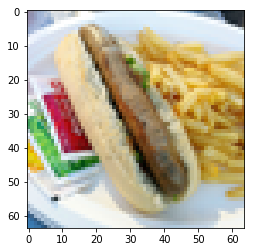

In [51]:
any_im = Trainreal[np.random.randint(len(Trainreal))]
plt.imshow(any_im)
any_im = np.expand_dims(any_im, axis=0)
print (any_im.shape)
valpred = seafoodModel.predict(x=any_im)
if valpred==1:
    print ("this is hot_dog")
elif valpred==0:
    print ("this is not hot_dog")